In [1]:
import torch
import librosa
import torchaudio
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
import IPython.display as display
from scipy.spatial.distance import cdist

C:\Users\asus\PycharmProjects\ML\venv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\asus\PycharmProjects\ML\venv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\asus\PycharmProjects\ML\venv\lib\site-packages\umap\distances.py:1086: NumbaD

Использовался bird song data set

In [2]:
SIZE = 10
data = 'archive/wavfiles/'
metadata = pd.read_csv('archive/bird_songs_metadata.csv')
species = metadata['species'].unique()
transform = torchaudio.transforms.LFCC(log_lf=True)
print(species)

['bewickii' 'polyglottos' 'migratorius' 'melodia' 'cardinalis']


In [3]:
bird_species = {}
for bird in species:
    bird_species[bird] = []

for ind, row in metadata.iterrows():
    bird_species[row['species']].append(row['filename'])

In [4]:
embeddings = {}
emb = []

for bird in bird_species.keys():
    audio_files = bird_species[bird]
    audio = []
    lfcc = []

    for audio_file in audio_files:
        file_path = data + audio_file
        wave, sample_rate = librosa.load(file_path)
        lfcc.append(transform(torch.Tensor(wave)))

    bird_embeddings = [emb.mean(dim=1) for emb in lfcc]
    embeddings[bird] = umap.UMAP().fit_transform(torch.stack(bird_embeddings))
    emb += bird_embeddings[:SIZE]

In [5]:
embs = umap.UMAP().fit_transform(torch.stack(emb))

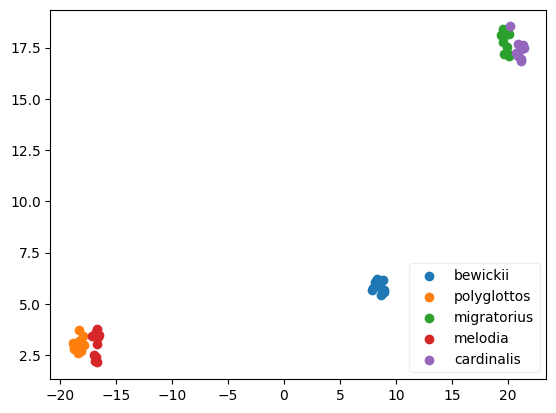

In [6]:
for i, name in enumerate(species):
    f = SIZE * i
    l = SIZE * (i + 1)
    plt.scatter(embs[:, 0][f:l], embs[:, 1][f:l], label=name)
plt.legend(loc="lower right", framealpha=0.3)
plt.show()

Самые схожие голоса методом пристального просмотра графика

In [7]:
file1 = data + bird_species['migratorius'][0]
display.Audio(file1)

In [8]:
file2 = data + bird_species['cardinalis'][0]
display.Audio(file2)

In [9]:
min_distance = np.inf
most_similar = []

for i in range(len(species)):
    for j in range(i + 1, len(species)):
        distance = 0
        bird1_embeddings = embs[i * SIZE: (i + 1) * SIZE]
        bird2_embeddings = embs[j * SIZE: (j + 1) * SIZE]
        mean_distance = np.sum(cdist(bird1_embeddings, bird2_embeddings, metric='cosine'))/ (len(bird1_embeddings) + len(bird2_embeddings))

        if mean_distance < min_distance:
            min_distance = mean_distance
            most_similar = [species[i], species[j]]

Самые схожие голоса с учетом среднего косинусного расстояния

In [10]:
file1 = data + bird_species[most_similar[0]][0]
print(most_similar[0])
display.Audio(file1)

polyglottos


In [11]:
file2 = data + bird_species[most_similar[1]][0]
print(most_similar[1])
display.Audio(file2)

melodia
